# Characterizing WTSN channels

This notebooks simulates a basic WTSN system with some UEs, an access point and 
some base schedules to determine what the packet latencies and throughput are under 
different conditions.

In [161]:
# Necessary imports


import matplotlib.pyplot as plt
import numpy as np

from network_classes import *

## Dummy simulation

Dummy simulation that marks all packets as delivered after a small wait time. Used
to test that all classes are functioning as they should.

In [162]:
# Create a schedule with 2 slots and 2 UEs
slot1 = Slot(0, 0, 10000, "reserved", ["UE0"])
slot2 = Slot(1, 10000, 20000, "reserved", ["UE0"])
schedule = {0: slot1, 1: slot2}
base_schedule = Schedule(0, 20000, 2, schedule)
print(base_schedule)

# Create a UE
ue = UE(0,{1: 0, 2: 1}, "central control", "Mode 1",  10)
ue.generate_packets(base_schedule, [100]*10, [1]*10)
print(ue)

# Serve the packets
ue.serve_packets(base_schedule)
print(ue)

latencies = ue.obtain_packet_latency()
print(latencies)

Schedule(Start Time: 0 microseconds, End Time: 20000 microseconds, Number of Slots: 2)
Slots: 
	Slot(Index: 0, Start Time: 0 microseconds, End Time: 10000 microseconds, Mode: reserved, UEs: ['UE0'])
	Slot(Index: 1, Start Time: 10000 microseconds, End Time: 20000 microseconds, Mode: reserved, UEs: ['UE0'])

UE(UE ID: 0, UE(MCS: {1: 0, 2: 1}, Network mode of Operation: central control, Service mode of Operation: Mode 1, Number of Packets: 10)
Packets: 
	Packet(Size: 100 bytes, Priority: 1, Sequence Number: 0, Arrival Time: -1 microseconds), Delivery Time: None microseconds), Status: ARRIVED
	Packet(Size: 100 bytes, Priority: 1, Sequence Number: 1, Arrival Time: -1 microseconds), Delivery Time: None microseconds), Status: ARRIVED
	Packet(Size: 100 bytes, Priority: 1, Sequence Number: 2, Arrival Time: -1 microseconds), Delivery Time: None microseconds), Status: ARRIVED
	Packet(Size: 100 bytes, Priority: 1, Sequence Number: 3, Arrival Time: -1 microseconds), Delivery Time: None microseconds

## Simulation of a UE with periodic slots  (Simulation 1)

- The base schedule is  
  - t0 - t1: UE 1
  - t1 - t2: UE 2
  - t2 - t3: UE 3
  - t3 - t4: UE 1 and repeat
- Packets are perfectly synchronized with the 

In [164]:
# Parameters affecting how a packet is served
# TODO: integrate MCS usage into the UE instead of having it outside
# TODO: Create a simple CSV file of this


# TODO: Remove the 67us from this that contains backoff 
parameters = {
    "setting 0": {
        "SNR": 20,
        "MCS": 0,
        "PER": 0,
        "payload_size": 64,
        "delivery_latency": 591.8
    },
    "setting 1": {
        "SNR": 20,
        "MCS": 0,
        "PER": 0,
        "payload_size": 964,
        "delivery_latency": 1470.2
    },
    "setting 2": {
        "SNR": 20,
        "MCS": 0,
        "PER": 0,
        "payload_size": 2464,
        "delivery_latency": 2953.4
    },
    "setting 3": {
        "SNR": 20,
        "MCS": 1,
        "PER": 0,
        "payload_size": 64,
        "delivery_latency": 534.2
    },
    "setting 4": {
        "SNR": 20,
        "MCS": 1,
        "PER": 0,
        "payload_size": 964,
        "delivery_latency": 980.6
    },
    "setting 5": {
        "SNR": 20,
        "MCS": 1,
        "PER": 0,
        "payload_size": 2464,
        "delivery_latency": 1715
    },
    "setting 6": {
        "SNR": 20,
        "MCS": 1,
        "PER": 0,
        "payload_size": 64,
        "delivery_latency": 519.8
    },
    "setting 7": {
        "SNR": 20,
        "MCS": 1,
        "PER": 0,
        "payload_size": 964,
        "delivery_latency": 807.8
    },
    "setting 8": {
        "SNR": 20,
        "MCS": 1,
        "PER": 0,
        "payload_size": 2464,
        "delivery_latency": 1311.8
    },
    
}



[1471.2, 1471.2, 1471.2, 1471.2, 1471.2, 1471.2, 1471.2, 1471.2, 1471.2, 13471.2, 13471.2, 13471.2, 1471.2000000000007, 1471.2000000000007, 1471.2000000000007, 1471.2000000000007, 1471.2000000000007, 1471.2000000000007, 25471.199999999997, 13471.2, 13471.2, 13471.2, 13471.2, 13471.2, 1471.2000000000007, 1471.2000000000007, 1471.2000000000007, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 25471.199999999997, 13471.199999999997, 25471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 25471.199999999997, 37471.2, 25471.199999999997, 25471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 13471.199999999997, 25471.199999999997, 25471.199999999997, 25471.199999999997, 25471.199999999997, 25471.199999999997, 25471.199999999997, 49471.2, 37471.2, 25471.199999999997, 25471.19

Text(0.5, 1.0, 'Simulation 1 \nUE_n_packets: 1200, num_UEs: 3,allowed_payload: 964 B, \n packet size: 100 B, delivery_latency: 1470.2 us ,\nnum_slots: 300, slot_duration: 4000 us ,\n')

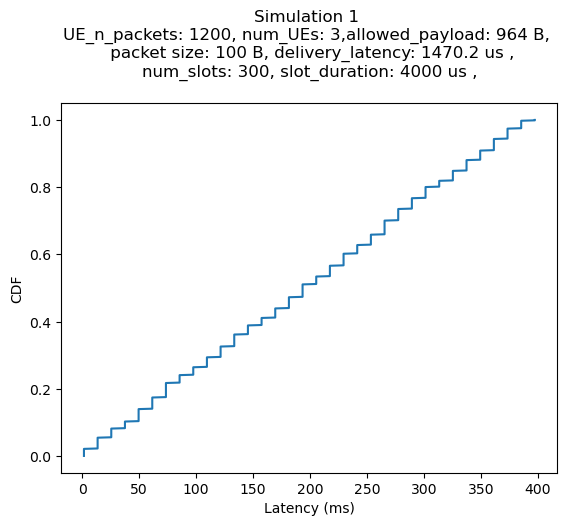

In [169]:
setting = "setting 1"
payload_size = parameters[setting]["payload_size"]
delivery_latency = parameters[setting]["delivery_latency"]
PER = parameters[setting]["PER"]
PER = 0.1
# payload_size=1000
# delivery_latency=5000

num_UEs = 3
UEs = ["UE" + str(i) for i in range(num_UEs)]
num_packets_per_ue = 1200  # Number of packets per UE for the whole period
packet_sizes = [100]*num_packets_per_ue
priorities = [1]*num_packets_per_ue

## Schedule parameters
num_slots_per_UE = 100
num_slots = num_slots_per_UE*num_UEs
start_offset = 10 # microseconds
end_time = start_offset
slot_duration = 4000 # microseconds
slots = {}


# TODO: move the knowledge of how many packets there are to this part of the code
# instead of keeping it in the UE class

# Create a schedule
start_time = start_offset
for i in range(num_slots):
    slots[i] = Slot(i, start_time, start_time + slot_duration, "reserved", [UEs[i%num_UEs]])
    start_time += slot_duration
schedule = Schedule(start_offset, start_time, num_slots, slots)

# print(schedule)


# Create UEs and packets
UEs = {}
for i in range(num_UEs):
    UE_temp = UE(i, {1: 0, 2: 1}, "central control", "Mode 2",  num_packets_per_ue)
    UE_temp.generate_packets(schedule, packet_sizes, priorities)
    UEs[i] = UE_temp

# for i in UEs:
#     print(UEs[i])

# Serve the packets
for i in UEs:
    UEs[i].serve_packets(schedule, payload_size=payload_size, delivery_latency=delivery_latency,
                         PER=PER)

# print(UEs[0])

latencies = UEs[0].obtain_packet_latency()
print(latencies)
latencies = [latency for latency in latencies if latency is not None]

# TODO: Make this more general i.e handle packet statuses directly instead of opearting under the 
# restrictions of this simulation
num_packets_queued = num_packets_per_ue - len(latencies)
print(f"Number of packets not served: {num_packets_queued}")

# Plot a cdf of the latencies using the latencies variable above
latencies = np.array(latencies)
latencies = latencies/1000 # convert to milliseconds
latencies = np.sort(latencies)
yvals = (np.arange(len(latencies)) + 1)/float(len(latencies))
plt.plot(latencies, yvals)
plt.xlabel("Latency (ms)")
plt.ylabel("CDF")
title = (f"Simulation 1 \nUE_n_packets: {num_packets_per_ue}, "
         f"num_UEs: {num_UEs},"
         f"allowed_payload: {payload_size} B, \n "
         f"packet size: {packet_sizes[0]} B, "
         f"delivery_latency: {delivery_latency} us ,\n"
         f"num_slots: {num_slots}, "
         f"slot_duration: {slot_duration} us ,\n")
plt.title(title)